# Assignment 4

**In this assignment, we will conclude our analysis of whether the stop and frisk policy was racially discriminatory, but from a very different angle than our previous mapping analysis. We will rely heavily on logistic regression and regularized regression, as discussed in class.**


## Data processing (5 points)

**First we need to do some data processing for consistency with previous of analysis of stop_and_frisk data. Read in the CSV file "sqf_sample.csv" and filter for stops between 2009 and 2013 (including both 2009 and 2013 in your sample). Filter for stops of white, Black, Hispanic, and Asian pedestrians using the suspect_race column. (5 points)**


In [1]:
import pandas as pd 
df=pd.read_csv('/content/sqf_sample.csv')

In [2]:
# Filter by year
df = df[(df['year'] >= 2009) & (df['year'] <= 2013)]

# Filter by race
df = df[df['suspect_race'].isin(["white", "black", "hispanic", "asian"])]


## Using regression to analyze the frisk decision. (30 points)

**We will start by testing for racial discrimination in the decision to conduct a frisk after a stop: ie, whether minority pedestrians are more likely to be frisked (patted down for weapons) after they are stopped, controlling for other factors.**

a.Using statsmodels, perform a logistic regression, using `frisked` as the dependent variable and `suspect_race` as the independent variable, to assess how the probability of being frisked after a stop varies by race. Write a few sentences interpreting the results, making sure to answer the following questions: which value of suspect_race is omitted from the regression coefficients, even though it appears in the data? Which race groups are most likely to be frisked after being stopped? How do you interpret the magnitude and sign of the coefficients? How do you interpret their statistical significance and confidence intervals? (5 points)

In [3]:
import statsmodels.api as sm

In [4]:
fitted_model = sm.Logit.from_formula('frisked ~ C(suspect_race)', data=df).fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.681382
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                frisked   No. Observations:               249802
Model:                          Logit   Df Residuals:                   249798
Method:                           MLE   Df Model:                            3
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                0.005311
Time:                        00:23:58   Log-Likelihood:            -1.7021e+05
converged:                       True   LL-Null:                   -1.7112e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.0900      0.022     -4.161      0.000      -0.132      -0.048
C(suspect_race)[T.black]        0.4048      0.022     18.128      0.000       0.361       0.449
C(suspect_race)[T.hispanic]     0.4267      0.023     18.726      0.000       0.382       0.471
C(suspect_race)[T.white]       -0.1219      0.025     -4.834      0.000      -0.171      -0.072
===============================================================================================
"""

1. "Asian" is omitted from the regression coefficients, even though it appeared in data.

2. Hispanic suspects are most likely to be frisked after being stoped, with a coefficient of 0.4614.

3. The coefficients for "black" and "hispanic" values of the dependent variable are positive, with similar maginitude close to 0.4, which is considerably big. This means that a suspect is black or hispanic, the odds of him/her getting firsked is a lot more higher. On the other hand, the coefficient of "white" is negative with a relatively small maginitude. This means that if a suspect is white, the odds of him/her getting frisked is slightly lower. 

4. All three ("white", "black", "hispanic") coefficients are statistically significant, as their p-value are all less than 0.05. The 95% confidence interval of all coefficients are all narrow, which agree with the small p-value. None of them overlap 0, which means that the dependent variable are likely to have an association with those values of the independent varaible.Based on the large sample size and the long observation timeline, the results are reasonable and reliable.

**b. Now perform a linear regression instead of a logistic regression using the same formula. How is the interpretation of the coefficients similar or different in the two regressions? What are the advantages of each? (5 points)**

In [5]:
fitted_model = sm.OLS.from_formula('frisked ~ C(suspect_race)', data=df).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                frisked   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     615.8
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:23:59   Log-Likelihood:            -1.7834e+05
No. Observations:              249802   AIC:                         3.567e+05
Df Residuals:                  249798   BIC:                         3.567e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.4775      0.005     89.395      0.000       0.467       0.488
C(suspect_race)[T.black]        0.1005      0.006     18.256      0.000       0.090       0.111
C(suspect_race)[T.hispanic]     0.1059      0.006     18.850      0.000       0.095       0.117
C(suspect_race)[T.white]       -0.0303      0.006     -4.873      0.000      -0.042      -0.018
==============================================================================
Omnibus:                   904686.798   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40481.509
Skew:                          -0.257   Prob(JB):                         0.00
Kurtosis:                       1.096   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. The interpretation of the signs of coefficients of linear regression is similar to that of logistic regression in that: positive coefficients indicate that a variable is associated with greater values of the output, and negative coefficients indicate that a variable is associated with smaller values. Both "black" and "hispanic" are positively correlated with "frisked", and "white" is negatively correclated with "frisked". The interpretation of coefficients is slightly different. For linear regression, with a unit increase of independent variable, the dependent variable increases the amount of the coefficient. 

2. Linear regression treats the depedent variable as a continuous value, while logistic regression treats the dependent variable as a binary value (0 or 1). The logistic regression is better when comparing different groups based on a categorical outcome, while the linear regression is better when observing how a set of independent features correlate to an outcome. In this case, the logistic regression would be a better choice because being frisked or not is a binary outcome.

**c. The regression using only race as an independent variable is a good starting point, but it does not control for any other variables. What other variables do you think are important to control for, and why?  (3 points)**


Some other variables worth considering: 

suspect_sex - men are thought to be more violent and more likely to carry weapons

suspect_age - younger suspects are more likely to carry weapons

suspect_build / supsect_height - heavier/bigger suspects look more threatening

time / date - the time at which the suspect is stopped can affect the possibility of them being frisked

location_housing / precinct - the neighborhood in which the suspect was found could also affect the result, since police are more careful with dangerous neighborhoods

**d. Run a logistic regression where you control for both race and for the "precinct" variable, which encodes the police precinct in which the stop occurred. Make sure to control for precinct as a categorical, not a numerical, variable, by writing it as C(precinct) in the regression formula - why is this important to do?**

How do the race coefficients change, and what does that mean? How does the interpretation of this regression differ from the regression in which you only control for race? Make one argument in favor of reporting results controlling for location, and one argument against it. (5 points) 

In [6]:
fitted_model = sm.Logit.from_formula('frisked ~ C(suspect_race) + C(precinct)', data=df).fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.660162
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                frisked   No. Observations:               249802
Model:                          Logit   Df Residuals:                   249722
Method:                           MLE   Df Model:                           79
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                 0.03629
Time:                        00:24:09   Log-Likelihood:            -1.6491e+05
converged:                       True   LL-Null:                   -1.7112e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6489      0.061    -10.635      0.000      -0.769      -0.529
C(suspect_race)[T.black]        0.4578      0.024     18.849      0.000       0.410       0.505
C(suspect_race)[T.hispanic]     0.3101      0.024     12.719      0.000       0.262       0.358
C(suspect_race)[T.white]        0.0305      0.027      1.134      0.257      -0.022       0.083
C(precinct)[T.5.0]              0.1716      0.081      2.117      0.034       0.013       0.330
C(precinct)[T.6.0]              0.2822      0.079      3.594      0.000       0.128       0.436
C(precinct)[T.7.0]              0.8584      0.078     11.071      0.000       0.706       1.010
C(precinct)[T.9.0]              0.2968      0.071      4.189      0.000       0.158       0.436
C(precinct)[T.10.0]             0.2543      0.081      3.144      0.002       0.096       0.413
C(precinct)[T.13.0]            -0.1085      0.074     -1.463      0.143      -0.254       0.037
C(precinct)[T.14.0]            -0.3188      0.065     -4.896      0.000      -0.446      -0.191
C(precinct)[T.17.0]            -0.4345      0.100     -4.340      0.000      -0.631      -0.238
C(precinct)[T.18.0]            -0.5150      0.082     -6.259      0.000      -0.676      -0.354
C(precinct)[T.19.0]            -0.0915      0.075     -1.225      0.221      -0.238       0.055
C(precinct)[T.20.0]            -0.4209      0.077     -5.462      0.000      -0.572      -0.270
C(precinct)[T.22.0]            -0.5254      0.127     -4.153      0.000      -0.773      -0.277
C(precinct)[T.23.0]             0.3589      0.062      5.773      0.000       0.237       0.481
C(precinct)[T.24.0]             0.0209      0.075      0.277      0.782      -0.127       0.168
C(precinct)[T.25.0]             0.5596      0.066      8.470      0.000       0.430       0.689
C(precinct)[T.26.0]             0.5933      0.073      8.156      0.000       0.451       0.736
C(precinct)[T.28.0]             0.2500      0.067      3.734      0.000       0.119       0.381
C(precinct)[T.30.0]             0.4550      0.069      6.625      0.000       0.320       0.590
C(precinct)[T.32.0]             1.1589      0.065     17.808      0.000       1.031       1.286
C(precinct)[T.33.0]             0.6502      0.071      9.132      0.000       0.511       0.790
C(precinct)[T.34.0]             0.4953      0.066      7.477      0.000       0.365       0.625
C(precinct)[T.40.0]             0.7928      0.062     12.799      0.000       0.671       0.914
C(precinct)[T.41.0]             0.7468      0.067     11.195      0.000       0.616       0.878
C(precinct)[T.42.0]             1.0516      0.066     15.967      0.000       0.923       1.181
C(precinct)[T.43.0]             0.5869      0.064      9.239      0.000       0.462       0.711
C(precinct)[T.44.0]             1.6174      0.065     24.747      0.000       1.489       1.746
C(precinct)[T.45.0]             0.1575      0.073      2.149      0.032  

1. We want to treat precinct as a categorical variable because it even though its value is numerical, it represents an area not a continuous number, and therefore not linearly correlated.

2. One change is that the coefficient for "white" became positive, which means that the odds of a suspect being frisked is higher if the suspect is white. This doesn't agree with the results when we only consider "suspect_race". Another change is that black becomes the race group that is most likely to be frisked. If we only control "suspect_race", hispanic suspects are more likely to be frisked.

3. Argument in favor of controlling location: There might be dangerous neighborhoods that the police are more careful about, making suspects stopped in those areas more likely to be frisked. In the results, for a lot of the precincts, the coefficients are large and the p-values are small, which means that suspects were more likely to be frisked if they were stopped in those areas. This indicates an association between location and "frisked".

4. Argument against controlling location: Although in there might be an association between "location" and "frisked", it does not mean that locatoin determines "frisked". For instance, an area might have a higher population concentration of a certain racial group, which cause it to have a higher "frisked" value associated with it. Race is still the only determinator, but since location is associated with race, we might get misleading result.

**e. In a few sentences, explain why it is a BAD idea, conceptually, to control for the following variables if we are trying to assess whether the police racially discriminate in whom they frisk after a stop: a) "found.weapon", which encodes whether the frisk found a weapon, and b) "suspect.eye" and "suspect.hair", which encode the suspect's eye and hair color. (4 points)**

1. "found.weapon": This variable indicates whether or not weapon is found after the suspect is frisked, which is unrelated to why he/she is frisked.
2. "suspect.eye" and "suspect.hair" might relate to "frisk" because certain races share similar traits (e.g. black and hispanic are more likely to have dark hair and eye color). But this is only because they are correlated to "suspect_race", and it does no mean that eye and hair color will determine the possibility of a suspect being frisked.

**f. In a few sentences, explain the problem of omitted variable bias in this analysis, and how it would undermine the conclusions. (4 points)**

Omitted variable bias occurs whenever we fail to control for something which is correlated with the independent variable of interest and helps determine the outcome. When this happens, the causal effect from the omitted variable becomes tangled up in the coefficient on the variable with which it is correlated, which undermines our ability to infer causality and severely impacts our results. 

One example is "precinct". When we control location as variable, black suspects are most likely to be frisked, which is different from the result when we do not control location. Another example is if we take "suspect.eye" and "suspect.hair" into account and omit "suspect_race". The results might show that eye and hair color determine the possibility of being frisked, but it is because "race" is omitted.


**g. In a few sentences, explain why only examining whether someone is frisked after a stop might fail to provide a full picture of discrimination in the stop and frisk policy. (4 points)**

When doing the analysis, we should also take the reason why the suspect is stopped into consideration. For instance, if suspects in a certain racial group is frisked more often than that of another group, given that they are all stopped for the same reason, then it means that race determines the possibility of being frisked. We might also want to look at the frequency of suspects being stopped and the outcome of the frisks for a full picture of the analysis.

## Outcome analysis using regularized regression (65 points)

Because of the issues with omitted variables in analyses like the one above, *outcome* tests are often used: these look not at the rate at which a decision is made (like the decision to frisk), but at the outcome of the decision (for example, if the frisk is conducted to find a weapon, does it actually find one?) Now we will use an outcome-style analysis. Specifically, we will fit a machine learning model to predict the probability that each stop which was conducted on suspicion the pedestrian possessed a weapon actually finds a weapon. Stops which are very unlikely to find a weapon arguably violate the Fourth Amendment, which prohibits unreasonable searches; if such stops disproportionately occur of certain race groups, the policy may violate the Fourteenth Amendment, which prohibits racial discrimination. 

**a. In this portion of this analysis, you will be using a smaller version of the data to speed up model fitting. Read in the CSV file "small_sqf_sample.csv". As before, we need to do some data processing for consistency with previous of analysis of this data. Load in the data and filter for stops between 2009 and 2013 (including both 2009 and 2013); filter for stops of white, Black, Hispanic, and Asian pedestrians using the suspect_race column; and filter for stops conducted on suspicion of criminal posession of a weapon (ie, suspected_crime == 'cpw'). (5 points)**

In [7]:
df2=pd.read_csv('/content/small_sqf_sample.csv')

In [8]:
# Filter by year
df2 = df2[(df2['year'] >= 2009) & (df2['year'] <= 2013)]

# Filter by race
df2 = df2[df2['suspect_race'].isin(["white", "black", "hispanic", "asian"])]

# Filter by stop reason
df2 = df2[df2["suspected_crime"]=='cpw']


**b. We will be fitting the regression model** 

`found_weapon ~ C(precinct) * C(suspect_race) + C(location_housing) + C(year) + suspect_age + suspect_height + suspect_weight + suspect_sex + ADDITIONAL_CIRCUMSTANCE_COLUMNS` 

where ADDITIONAL_CIRCUMSTANCE_COLUMNS are any columns that begin with "stopped_bc" or "additional_" besides "additional_other" and "stopped_bc_other". You can get these columns by running

`ADDITIONAL_CIRCUMSTANCE_COLUMNS = [a for a in d.columns if ('stopped_bc' in a or 'additional_' in a) and a not in (['additional_other', 'stopped_bc_other'])]`

You should have 18 additional columns. These columns provide more information about the circumstances of the stop, and we include them for consistency with the original analysis and because they turn out to be important for predictive performance. 

Drop any rows with missing values in any of the variables you need. 

Now, we need to put the data into a format which sklearn can use later - ie, numpy arrays. Do this with "patsy" library and the "dmatrix" function. You can call dmatrix as follows:

`sqf_X = patsy.dmatrix('C(precinct) * C(suspect_race) + C(location_housing) + C(year) + suspect_age + suspect_height + suspect_weight + suspect_sex +' + '+'.join(ADDITIONAL_CIRCUMSTANCE_COLUMNS),sqf_data, return_type='dataframe')`

and it will return a dataframe on which you can fit a regression model. The first argument to dmatrix is the formula that you want to use to make the dataframe; the second argument gives patsy the data you want to use; return_type='dataframe' ensures that you get a dataframe, not a patsy object which is hard to use.

Look at the output of dmatrix and explain what the columns mean. Why can't we just pass the columns from the original dataframe directly into the sklearn function? (8 points)


In [9]:
# Get additional columns that begin with "stopped_bc" or "additional_" besides "additional_other" and "stopped_bc_other"
ADDITIONAL_CIRCUMSTANCE_COLUMNS = [a for a in df2.columns if ('stopped_bc' in a or 'additional_' in a) and a not in (['additional_other', 'stopped_bc_other'])]

In [10]:
ADDITIONAL_CIRCUMSTANCE_COLUMNS

['stopped_bc_object',
 'stopped_bc_desc',
 'stopped_bc_casing',
 'stopped_bc_lookout',
 'stopped_bc_clothing',
 'stopped_bc_drugs',
 'stopped_bc_furtive',
 'stopped_bc_violent',
 'stopped_bc_bulge',
 'additional_report',
 'additional_investigation',
 'additional_proximity',
 'additional_evasive',
 'additional_associating',
 'additional_direction',
 'additional_highcrime',
 'additional_time',
 'additional_sights']

In [11]:
# Dropping missing values
df2_dropped = df2.dropna(subset=[
 'precinct',
 'suspect_race',
 'found_weapon',
 'location_housing',
 'year',
 'suspect_age',
 'suspect_weight',
 'suspect_height',
 'suspect_sex',
 'stopped_bc_object',
 'stopped_bc_desc',
 'stopped_bc_casing',
 'stopped_bc_lookout',
 'stopped_bc_clothing',
 'stopped_bc_drugs',
 'stopped_bc_furtive',
 'stopped_bc_violent',
 'stopped_bc_bulge',
 'additional_report',
 'additional_investigation',
 'additional_proximity',
 'additional_evasive',
 'additional_associating',
 'additional_direction',
 'additional_highcrime',
 'additional_time',
 'additional_sights'
 ])

In [12]:
import patsy
from patsy import dmatrix

sqf_X = patsy.dmatrix('C(precinct) * C(suspect_race) + C(location_housing) + C(year) + suspect_age + suspect_height + suspect_weight + suspect_sex +' + '+'.join(ADDITIONAL_CIRCUMSTANCE_COLUMNS),df2_dropped, return_type='dataframe')

In [13]:
sqf_X

,Intercept,C(precinct)[T.5.0],C(precinct)[T.6.0],C(precinct)[T.7.0],C(precinct)[T.9.0],C(precinct)[T.10.0],C(precinct)[T.13.0],C(precinct)[T.14.0],C(precinct)[T.17.0],C(precinct)[T.18.0],...,C(precinct)[T.113.0]:C(suspect_race)[T.white],C(precinct)[T.114.0]:C(suspect_race)[T.white],C(precinct)[T.115.0]:C(suspect_race)[T.white],C(precinct)[T.120.0]:C(suspect_race)[T.white],C(precinct)[T.121.0]:C(suspect_race)[T.white],C(precinct)[T.122.0]:C(suspect_race)[T.white],C(precinct)[T.123.0]:C(suspect_race)[T.white],suspect_age,suspect_height,suspect_weight
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,6.000000,170.0
17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,5.583333,180.0
20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,6.333333,270.0
23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,5.500000,160.0
26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,5.583333,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204287,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,5.583333,160.0
204289,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,6.083333,170.0
204291,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,5.833333,170.0
204298,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,5.750000,170.0


Dmatrix converted/encoded all the textual information (true or false) in each column into numerical values of 0 and 1. For example, if we are looking for data regarding precinct 10, all columns about precinct 10 stop and frisks will show 1 but columns for other precincts will show 0. This is very helpful given that we are doing logistic regression later on in this problem. Logistic regression need numerical values for model fitting.

**c. As discussed in class, when fitting machine learning models, you should always divide the dataset into a train, val, and test set. Randomly divide the filtered, processed data into three pieces - the train set (60%), the val set (20%) and the test set (20%). (5 points)**

In [117]:
# Train set
sqf_train = sqf_X.sample(frac=0.6)

# Validation set
sqf_validation_1 = sqf_X.drop(sqf_train.index)
sqf_validation_2 = sqf_validation_1.sample(frac=0.5)

# Test set
sqf_test = sqf_validation_1.drop(sqf_validation_2.index)
sqf_test_copy = sqf_test.copy()

In [118]:
# Get the dependent variables from the found_weapon column for the next question
train_found_weapon = df2_dropped['found_weapon'].loc[sqf_train.index.values]
validation_found_weapon = df2_dropped['found_weapon'].loc[sqf_validation_2.index.values]
test_found_weapon = df2_dropped['found_weapon'].loc[sqf_test.index.values]

**d. We will be training a regularized logistic regression model to predict the outcome. When using many machine learning models, including regularized logistic regression, it is important to preprocess the input features so they are all on the same scale, for reasons discussed in class. In this case, we will take each column in the input data, subtract its mean, and divide by its standard deviation. This makes it so each column of the data has mean 0 and standard deviation 1.**

When scaling the data, it is important to compute the scaling using only the train set, as shown in class. The reason is that we are pretending that the train data is all we have access to to fit our model fitting pipeline, so we cannot "peek" at the validation or test sets to generate our scaling. Use sklearn's StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to fit a scaling transform on the train set and transform the train set (you can use the fit_transform method on the train set).Then apply the fitted StandardScaler model to the validation and test sets as well (using the transform --- not the fit --- method). (Look at the notebook we went through in class on regularization and lasso if you are confused.) The transformed datasets are the final datasets you will feed into your logistic regression model. (5 points)

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Transform train set, validation set, and test set using scaler
sqf_train = scaler.fit_transform(sqf_train)
sqf_validation_2 = scaler.transform(sqf_validation_2)
sqf_test = scaler.transform(sqf_test)

**e. Using sklearn.linear_model.LogisticRegression, fit a model on the train set to predict found_weapon. Set the "penalty" argument to "none" so that the model will not use any regularization; this corresponds to fitting a regular logistic regression model. If you get a `ConvergenceWarning`, increase the number of iterations using the `max_iter` argument; this means the model optimization needs more iterations to converge. (Look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) if you are uncertain which arguments to use!)**

A standard measure of predictive performance for binary outcome variables like found_weapon is AUC. Higher values of AUC are better; an AUC of 1 means that the model is perfectly predicting the outcome; an AUC of 0.5 means that it is predicting it only as well as random chance. Report the AUC of the fitted model (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) on both the train and validation sets. What is the problem with using accuracy as a metric for this task? How does the train set AUC differ from the validation AUC, and does this make sense? (7 points)

In [120]:
from sklearn.linear_model import LogisticRegression as logReg
from sklearn import metrics

# Fit a logistic regression model on found_weapon column
found_weapon_reg = logReg(penalty='none', max_iter=1500)
found_weapon_reg.fit(sqf_train, train_found_weapon)

LogisticRegression(max_iter=1500, penalty='none')

In [121]:
# Calculate the AUC of fitted model using sklearn
predicted_val_train = found_weapon_reg.predict_proba(sqf_train)[::,1]
train_auc = metrics.roc_auc_score(train_found_weapon, predicted_val_train)
print("AUC of training set:", train_auc)

# Calculate the AUC of validation set
predicted_val_validation = found_weapon_reg.predict_proba(sqf_validation_2)[::,1]
validation_auc = metrics.roc_auc_score(validation_found_weapon, predicted_val_validation)
print("AUC of validation set:", validation_auc)

AUC of training set: 0.8363328538894882
AUC of validation set: 0.7498650253752295


The problem with using accuracy as a metric for this task is that the data itself is tinted with discrimination. We believe that there is a correlation between the race of the person who is stopped and frisked and how often they are stopped. In fact, based on our answer to the first question, we already calcualated such positive correlation for Black and Hispanic population, and a negative correlation for White population. 
As for why we have different AUC for test set and validation set, we could have overfitted our data because of this inherent bias in the dataset, that is why the performance of the validation set is lower.

**f. Our logistic regression model is not using any regularization and appears to be overfitting. We will try to use regularization to reduce overfitting. You will be fitting an L1-penalized logistic regression model using code that looks something like**

`LogisticRegression(C=sparsity_param, penalty='l1', solver='liblinear')`

(the "l1" specifies that we're using an L1 penalty, as discussed in class; the "liblinear" solver is an optimizer that works with the L1 penalty. See the logistic regression documentation for more details.) 

Increase and decrease the amount of regularization using different values of the C parameter, searching logarithmically over at least 20 values in the range from 1e-2 to 1. (Note: we do not recommend defining a variable named "C" in your code, because this may cause weird patsy issues, since patsy also uses "C". Give the variable another name. Sorry! I complained to the patsy people.) 

People generally use logarithmic, not linear spacing, for regularization hyperparameters, because it can be hard to know the appropriate scale - so eg [0.001, 0.01, 0.1, 1, 10] not [1, 2, 3, 4, 5]. Here, we want you to generate logarithmically spaced values between 1e-2 to 1. In general, you can generate logarithmically spaced values by searching over 10**X (the double stars mean raise 10 to the power of X) where X is a linearly spaced vector like [1, 2, 3, 4, 5]. In this case, choose X so you get the appropriate endpoints. Another best practice when searching over hyperparameters is to confirm that whichever one you choose is not on the edge of the space.

Print out the train set, val set, and test set AUC for each value of of the regularization parameter. Make a plot where the x-axis is the regularization parameter and the y-axis is AUC, with one line for train AUC, one line for val AUC, and one line for test AUC (use plt.semilogx to plot the lines so the x-axis will be logarithmic, making it easier to see the plot). Comment on the trends. Do you see evidence of overfitting? Explain. For the rest of this assignment, use the model with the highest AUC on the validation set. (10 points)

In a full analysis, it would make sense to play with other aspects of the model as well: for example, you could try using other forms of regularization (like L1 vs L2) or other classification algorithms besides logistic regression. The basic pattern, though, would be the same: fit the model on the train set, choose models on the val set, and once you've chosen your best model, assess your results (once!) on the test set.

In [122]:
import numpy as np

# Generate logarithmically spaced values using numpy
log_val = np.logspace(-2, 0, num=20)
print(log_val)

[0.01       0.01274275 0.01623777 0.02069138 0.02636651 0.03359818
 0.04281332 0.05455595 0.06951928 0.08858668 0.11288379 0.14384499
 0.18329807 0.23357215 0.29763514 0.37926902 0.48329302 0.61584821
 0.78475997 1.        ]


In [123]:
# Arrays to store AUC values
auc_train = []
auc_validation = []
auc_test = []

In [124]:
# Calculate AUC for train set, validation set, and test set with each log value
for val in log_val:
  reg_model = logReg(C=val, penalty='l1', solver='liblinear')
  reg_model.fit(sqf_train, train_found_weapon)
  print("\nLog value: ",val)

  # Train set (same steps as question(e)) 
  predicted_val_train = reg_model.predict_proba(sqf_train)[::,1]
  train_auc = metrics.roc_auc_score(train_found_weapon, predicted_val_train)
  auc_train.append(train_auc)
  print("AUC of training set:", train_auc)

  # Validation set (same steps as question(e)) 
  predicted_val_validation = reg_model.predict_proba(sqf_validation_2)[::,1]
  validation_auc = metrics.roc_auc_score(validation_found_weapon, predicted_val_validation)
  auc_validation.append(validation_auc)
  print("AUC of validation set:", validation_auc)

  # Test set (same steps as question(e)) 
  predicted_val_test = reg_model.predict_proba(sqf_test)[::,1]
  test_auc = metrics.roc_auc_score(test_found_weapon, predicted_val_test)
  auc_test.append(test_auc)
  print("AUC of test set:", test_auc)


Log value:  0.01
AUC of training set: 0.7595560649646411
AUC of validation set: 0.7803788375590268
AUC of test set: 0.7727568380959631

Log value:  0.012742749857031334
AUC of training set: 0.7696676854848377
AUC of validation set: 0.7857686047705958
AUC of test set: 0.7742718083674751

Log value:  0.016237767391887217
AUC of training set: 0.77941511596548
AUC of validation set: 0.7884680972660066
AUC of test set: 0.7764511498549598

Log value:  0.0206913808111479
AUC of training set: 0.7876336075152823
AUC of validation set: 0.7881895886500168
AUC of test set: 0.776894630385315

Log value:  0.026366508987303583
AUC of training set: 0.7973991669663192
AUC of validation set: 0.7864833118690759
AUC of test set: 0.7760158252883813

Log value:  0.03359818286283781
AUC of training set: 0.8061952010667626
AUC of validation set: 0.7885895744283002
AUC of test set: 0.776542564615623

Log value:  0.04281332398719394
AUC of training set: 0.8137878685724559
AUC of validation set: 0.7897770219198

<function matplotlib.pyplot.show(*args, **kw)>

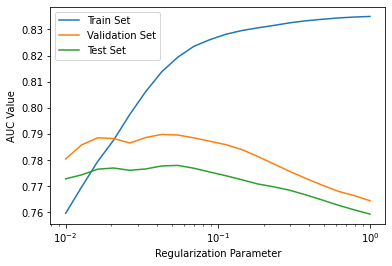

In [125]:
import matplotlib.pyplot as plt

# Plot the AUC values of train, validation, and test set against the regularization parameter log values
plt.semilogx(log_val, auc_train, label='Train Set')
plt.semilogx(log_val, auc_validation, label='Validation Set')
plt.semilogx(log_val, auc_test, label='Test Set')
plt.xlabel("Regularization Parameter")
plt.ylabel("AUC Value")
plt.legend()
plt.show

Yes, we see evidence of overfitting. The AUC value of the training set increases quickly before around the value of 0.08. After that, it still continues to climb, but very slowly. On the other hand, for the test set, AUC starts to quickly go down after 0.08. For the balidation set, AUC starts to go down after about 0.03. All of these demonstrate that we have overfitted our model after a log value in betwen 0.03 and 0.08 - the performance of the train set keeps improving, but it does not generalize to validation and test set.

In [126]:
# Find out the max AUC value of the validation set and the corresponding log value
max_val_auc = max(auc_validation)
max_val_log = log_val[auc_validation.index(max_val_auc)]
print("Maximum AUC: ", max_val_auc, "\nCorrespinding log value: ", max_val_log)

Maximum AUC:  0.7897770219198791 
Correspinding log value:  0.04281332398719394


**g. Assess model *calibration* on the test set. This checks whether the model's predicted probabilities line up with the true probabilities, and is important to assess here because we will be analyzing the model's predicted probabilities. To assess calibration, take the 10% of rows of the test set with the highest model predictions and compare the mean model predicted probability (ie, the output of `predict_proba`) to the actual mean of the outcome variable. Repeat for the next 10% of rows, and for all 10% groups. Make a plot comparing the model predicted probabilities on each 10% group to the actual outcomes (mean predicted probability on the x-axis and mean actual outcome on the y-axis). You should end up with a plot with 10 points, one for each 10% group. Plot the line y=x so you can see how well the predicted probabilities line up with the actual probabilities - ideally, your points will lie on the line or close to it. (10 points)**

Calibration is an issue for many machine learning models, including deep learning models, so this is always a good thing to check. In a full analysis, it would make sense to check calibration (and AUC) for subgroups as well (eg, each race group). 

In [127]:
# Fit a new logistic regression model with parameters from the highest AUC on validation set
reg_model_new = logReg(C=max_val_log, penalty='l1', solver='liblinear')
reg_model_new.fit(sqf_train, train_found_weapon)

# Predict with test set
test_predicted = reg_model_new.predict_proba(sqf_test)[::,1]

# Create a new dataframe combining prediction and true values
predicted_set = pd.DataFrame({"Predicted Value":test_predicted}, index=test_found_weapon.index)
test_true = pd.concat([predicted_set, test_found_weapon], axis=1)
test_true

,Predicted Value,found_weapon
57,0.014667,False
149,0.025733,False
211,0.022933,False
225,0.035491,False
241,0.051532,False
...,...,...
204201,0.555000,True
204217,0.023492,False
204238,0.028642,False
204251,0.023593,False


In [128]:
# Encode found_weapon column to numerical values and sort model predictions from highest to lowest
test_true['found_weapon'] = test_true['found_weapon'].astype(int)
test_true = test_true.sort_values(by=['Predicted Value'], ascending=False)
test_true

,Predicted Value,found_weapon
142568,0.955049,1
203928,0.912134,1
145642,0.905097,1
70601,0.884284,1
162249,0.867473,0
...,...,...
120684,0.003860,0
80774,0.003787,0
64701,0.003744,0
1053,0.002528,0


In [129]:
# Create two empty arrays to store mean of predicted probability and actual probability
copy_test_true = test_true.copy()
predicted_mean = []
true_mean = []

# Calculate the number of 10% of rows
row = copy_test_true.shape[0]//10

# For every 10% of rows, calculate the mean of predicted probability and actual probability, and store in corresponding array
for i in range(0, copy_test_true.shape[0] + 1, row):
  calib_10 = copy_test_true.head(i)
  mean_predicted = calib_10['Predicted Value'].mean()
  predicted_mean.append(mean_predicted)
  mean_true = calib_10['found_weapon'].mean()
  true_mean.append(mean_true)

In [130]:
# Remove the first null value of the mean array
predicted_mean = predicted_mean[1:11]
true_mean = true_mean[1:11]
print(len(predicted_mean))
print(len(true_mean))

10
10


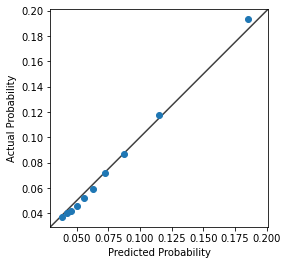

In [131]:
# Plot mean predicted probability against mean actual outcome
fig, ax = plt.subplots()
plt.scatter(predicted_mean,true_mean)

# (I referenced a Stack Overflow answer on adding y=x to a matplotlib plot: https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Predicted Probability')
plt.ylabel('Actual Probability')
plt.show()

**h. Using the test set, compute the fraction of observations which have lower than a 2% model-predicted probability of finding a weapon for white, black, Hispanic, and Asian pedestrians. Stops below this threshold are extremely unlikely to have resulted in finding a weapon, arguably violating the Fourth Amendment. Repeat this for 20 thresholds evenly spaced between 1% and 5%. Make a graph where the x-axis is the threshold, and the y-axis is the fraction of stops falling below that threshold, with one line for each race group. Explain what you observe. Do you think this graph provides evidence for Fourteenth Amendment violations (racial discrimination)? (10 points)**

In [134]:
# Extract suspect_race from dataframe
df2_race = df2_dropped['suspect_race'].loc[sqf_test_copy.index.values]

In [136]:
# Calcualte the fraction of observations that have lower than threshold probability of finding a weapon
def calculateFraction(race, threshold):
  num_stops = df2_race[df2_race == race].shape[0] # Total number of stops for a certain race
  stops = test_true[test_true['Predicted Value'] < threshold] # Filter for those predictions below threshold
  suspect_race = df2_dropped.loc[stops.index, 'suspect_race']
  race_based_stop = suspect_race[suspect_race == race].shape[0] # Stops that have lower than threshold percentage of predicted probabability of finding a weapon
  fraction = race_based_stop/ num_stops
  return fraction

In [137]:
# Fraction of stops with lower than 2% threshold probabability of finding a weapon. Breakdown by race
print("White: ", calculateFraction('white', 0.02))
print("Black: ", calculateFraction('black', 0.02) )
print("Hispanic: ", calculateFraction('hispanic', 0.02) )
print("Asian: ", calculateFraction('asian', 0.02) )

White:  0.06896551724137931
Black:  0.5672601384767557
Hispanic:  0.305
Asian:  0.38372093023255816


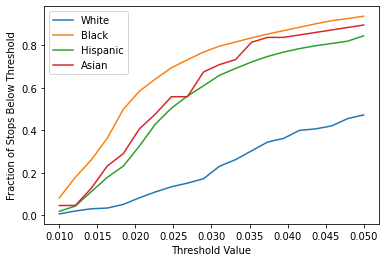

In [140]:
# Find 20 thresholds evenly spaced between 1% and 5%
thresholds = np.linspace(0.01, 0.05, num=20, endpoint=True)

white_frac = []
black_frac = []
hispanic_frac = []
asian_frac = []

# Calculate fraction for each threshold value and append the value to arrays
for thres in thresholds:
  white_frac.append(calculateFraction('white', thres))
  black_frac.append(calculateFraction('black', thres))
  hispanic_frac.append(calculateFraction('hispanic', thres))
  asian_frac.append(calculateFraction('asian', thres))

# Plot the fraction of stops falling below threshol against threshold, with one line for each race group
fig, ax = plt.subplots()
ax.plot(thresholds, white_frac, label = "White")
ax.plot(thresholds, black_frac, label = "Black")
ax.plot(thresholds, hispanic_frac, label = "Hispanic")
ax.plot(thresholds, asian_frac, label = "Asian")
ax.set_xlabel("Threshold Value")
ax.set_ylabel("Fraction of Stops Below Threshold")
ax.legend()

From the graph, we see that White pedestrians have the lowest rate of being stopped, and Black pedestrians have the highest rate of being stopped regardless of the threshold. <br>
This graph is evidence for Fourteenth Amendment violations (racial discrimination) for the following reasons: <br>
1) No matter if the threshold is 2% or 5%, White pedestrians have a much lower rate of being stopped and frisked compared to other populations. When we look closely at the 2% threshold, all three other races have almost double or triple the fraction of being stopped, showing that the police's decision to stop and frisk is highly racially motivated and biased towards White population. <br>
2) As the threshold value increases, the line for White pedestrains increases at a much slower rate compared to Black and Hispanic populations. This indicates that even as the probability of finding a weapon becomes higher, police is still less inclined to stop White population and more willing to stop Black, Hispanic, and Asian population. 

**i. The analysis you have performed in the second part of this assignment is very similar to the analysis in [this paper](https://5harad.com/papers/stop-and-frisk.pdf). Read the paper and write a few sentences about their main conclusions. (5 points)**

The paper draws these main conclusions: <br>
1) The authors of the paper found out that in "43% of the CPW stops between 2011 and 2012, there was only 1% chance of finding a weapon on the suspect", suggesting that individuals were often stopped with little evidence of criminal activity. <br>
2) Black and Hispanics were disproportionately involved in low hit rate stops compared to Whites, even after correcting for factors such as highly localized policing tactics. <br>
3) The authors suggest that one can "recover 50% of weapons by conducting only the 6% of CPW stops with the highest ex ante hit rate, and 90% of weapons by conducting 58% of CPW stops". They also developed a set of stop heuristics that can help police officers achieve such statistical efficacy via a simple scoring rule.